In [2]:
import sys
import os
sys.path.append("../coevo/")

In [3]:
%matplotlib inline
import coevo
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

## Problem

Minimize the total surface area $T$ and curved surface area $S$ of a cone

$$s = \sqrt{r^2 + h^2}$$
$$B = \pi r^2$$
$$S = \pi r s$$
$$T = B + S$$

In [4]:
def T(x):
    """TSA
    """
    s = np.sqrt(np.sum(x * x))
    B = np.pi * x[0] * x[0]
    S = np.pi * x[0] * s
    return B + S

def S(x):
    """CSA
    """
    s = np.sqrt(np.sum(x * x))
    return np.pi * x[0] * s

## Fitness functions

In [5]:
fitness_functions = [
    lambda x: 1 / T(x),
    lambda x: 1 / S(x)
]

## Solve

In [52]:
solver = coevo.CoEvoMO(20, 2, fitness_functions, lb=1, ub=20)

fitnesses = []

for gen in xrange(100):
    solver.evolve(0.7, 0.05, elite=3)
    fitnesses.append(np.copy(solver.fitness))

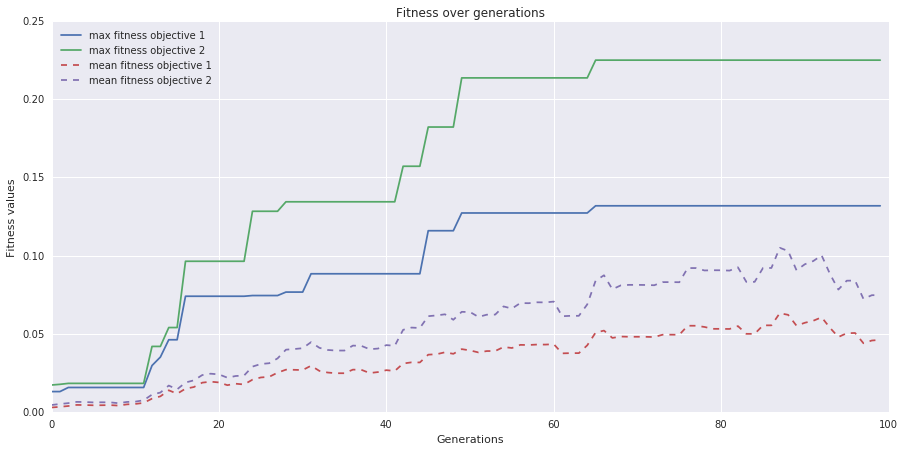

In [53]:
mean_fitnesses = np.array(map(lambda x: np.mean(x, axis=0).tolist(), fitnesses))
max_fitnesses = np.array(map(lambda x: np.max(x, axis=0).tolist(), fitnesses))

plt.figure(figsize=(15, 7))
plt.title("Fitness over generations")
plt.xlabel("Generations")
plt.ylabel("Fitness values")
plt.plot(max_fitnesses[:, 0], label="max fitness objective 1")
plt.plot(max_fitnesses[:, 1], label="max fitness objective 2")
plt.plot(mean_fitnesses[:, 0], label="mean fitness objective 1", ls="--")
plt.plot(mean_fitnesses[:, 1], label="mean fitness objective 2", ls="--")
plt.legend(loc="upper left")
plt.show()